### `TP - COMPUTACIÓN CIENTIFICA ACTUARIAL 1C 2022.

### `Objetivo:`
- Implementar las técnicas aprendidas como parte del curso.

### `Data information`

- TRIPS
    1. Request id: un identificador único de la solicitud
    2. Time of request: La fecha y hora en que el cliente realizó la solicitud de viaje
    3. Drop-off time: La fecha y hora de regreso, en caso de que el viaje se haya completado
    4. Pick-up point: El punto desde el que se realizó la solicitud
    5. Driver id: el número de identificación único del conductor
    6. Status of the request: el estado final del viaje puede ser completado, cancelado por el conductor o no hay autos disponibles
    
   
- DRIVERS
    1. Driver id: identificador de conductor/a.
    2. Name: Nombre del conductor/a.
    3. Gender: Género del conductor/a.
    
### `Objetivos de aprendizaje.:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Realizar comentarios acerca de los insights que van encontrando en la data será tenido en cuenta a la hora de corregir el TP.:`

### Importar Librerias

Librerias: Pandas, Numpy, matplotlib, seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

### Leer datasets

**Trips**

In [3]:
trips = pd.read_csv("trips.csv")

**Drivers**

*Leer dataset con el parametro delimiter=";"*

In [2]:
drivers = pd.read_csv("drivers.csv",delimiter=";")

### 1. Sanity check de los datos.

#### 1.1 Inspeccionar datasets con head()

In [4]:
trips.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
drivers.head()

,Driver id,Name,Gender
0,"1,00",Nakita Atherton,F
1,"2,00",Lynsey Clegg,F
2,"3,00",Rohit Meyer,M
3,"4,00",Gabriela Mathis,F
4,"5,00",Tomas Sanford,M


#### 1.2 Chequear shape de datasets

Utilizar print statements avanzados para que quede un output del estilo:

"El dataset correspondiente a trips tiene la forma:    ; y el dataset drivers tiene la forma:    ..."

In [6]:
a = trips.shape
b = drivers.shape
print("El dataset correspondiente a trips tiene la forma:{}; y el dataset drivers tiene la forma:{}".format(a,b))

El dataset correspondiente a trips tiene la forma:(6745, 6); y el dataset drivers tiene la forma:(300, 3)


#### 1.3 Inspeccionar columnas y dtypes.

Imprimir columnas de cada dataset.

In [8]:
trips.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [9]:
drivers.columns

Index(['Driver id', 'Name', 'Gender'], dtype='object')

### 2. Joinear ambas bases para continuar con el chequeo de valores nulos. 

Utilizar la funcion merge de pandas y llamar al nuevo dataframe df_final. La idea es usar el dataframe trips como table madre, y traer la información de los drivers del dataframe de conduntores/as.

**No debemos perder datos de la tabla de trips.**

**Pista:** Las variables para joinear, son del mismo dtype? En caso que no lo sean, conviertan la columna en el mismo dtype que el dataset madre para que funcione el merge. 

**2.1 Modificar la columna Driver id del dataset de drivers a float**

Vemos que en la columna Driver id del dataset de drivers, tenemos una ",", la cual no nos va a permitir convertir el string a float.

1. Cambiar la coma por . utilizando .replace() sobre la columna Driver id
2. Modificar el dtype de la columna y pasarlo a float.

In [11]:
drivers["Driver id"] = drivers["Driver id"].str.replace(',','.')

In [12]:
drivers["Driver id"] = drivers["Driver id"].astype(float)
drivers.dtypes # chequeamos que nos haya cambiado dtype

Driver id    float64
Name          object
Gender        object
dtype: object

**2.2 Joinear datasets y obtener el df_final**

In [13]:
df_final = trips.merge(drivers, on="Driver id", how="outer") # realizamos outer join para no perder datos de trips
df_final

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Name,Gender
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,Nakita Atherton,F
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,Nakita Atherton,F
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,Nakita Atherton,F
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,Nakita Atherton,F
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,Nakita Atherton,F
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN,NaN,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN,NaN,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN,NaN,NaN


**2.3 Chequear shape del dataset madre y el dataset nuevo**

Debemos tener la misma cantidad de filas para asegurarnos que el merge se hizo correctamente.

In [69]:
print(trips.shape, df_final.shape)

(6745, 6) (6745, 16)


### 3. Analizar valores nulos del dataset mergeado.

In [14]:
df_final.isna().sum() # Observamos la cantidad de NaN en cada columna

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Name                 2650
Gender               2650
dtype: int64

In [15]:
df_final["Status"].value_counts() # Analizamos relación entre los NaN y el status del viaje

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [25]:
df_test = df_final.loc[df_final["Status"] == "No Cars Available"] # Armamos un nuevo df con los viajes "No Cars available"
df_test

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Name,Gender
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN,NaN,NaN
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN,NaN,NaN
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN,NaN,NaN
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN,NaN,NaN
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN,NaN,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN,NaN,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN,NaN,NaN


In [16]:
df_test["Driver id"].isna().sum() # coincide con la cantidad total de NaN en el df mergeado

2650

In [26]:
# Si el status es "No Cars Available", tenemos NaN en Driver id y por ende en Name y Gender
# Si el status es "Cancelado" o "No Cars Available", el viaje no se concretó y tenemos NaN en Drop time

### 4. Analizar valores unicos para las distintas variables

**4.1 Variables categoricas**

- Realizar este procedimiento solo para las columnas Pickup point y Status. Usar print avanzado con .format().

In [16]:
df_final["Pickup point"].unique() #buscamos la cantidad de variables categóricas

array(['Airport', 'City'], dtype=object)

In [17]:
a = df_final["Pickup point"].value_counts().City
b = df_final["Pickup point"].value_counts().Airport
print("La cantidad de viajes solicitados desde City es {} y desde Airport, {}".format(a,b))

La cantidad de viajes solicitados desde City es 3507 y desde Airport, 3238


In [18]:
df_final["Status"].unique() #buscamos la cantidad de variables categóricas

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [19]:
c = df_final[df_final['Status'] == "No Cars Available"].count()['Status']
d = df_final[df_final['Status'] == "Cancelled"].count()['Status']
e = df_final[df_final['Status'] == "Trip Completed"].count()['Status']
print("La cantidad de cancelados es {}, la de no realizados por no haber autos disponibles {} y la de completados {}".format(d,c,e))

La cantidad de cancelados es 1264, la de no realizados por no haber autos disponibles 2650 y la de completados 2831


### 5. Feature engineering

#### 5.1 Corregir las columnas request timestamp y drop timestamp.

*Observemos que en request timestamp, tenemos algunas fechas separadas con "/" y otras separadas con "-". 
Estandarizemos dicho problema y dejemos solo "/" tanto para las columnas request timestamp y drop timestamp.

In [20]:
df_final["Request timestamp"] = df_final["Request timestamp"].str.replace('-','/')
df_final["Drop timestamp"] = df_final["Drop timestamp"].str.replace('-','/')

**5.2 Convertir las columnas request timestamp y drop timestamp en formato datetime**

In [21]:
df_final["Request timestamp"] = pd.to_datetime(df_final["Request timestamp"])

In [25]:
df_final["Drop timestamp"] = pd.to_datetime(df_final["Drop timestamp"])

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
Name                         object
Gender                       object
dtype: object

**5.3 Crear las columnas year, month y hour para cada columna datetime**

La idea es tener una columna que sea "request_**col**" y "drop_**col**"; siendo **col**: {year, month, hour}.

**Year**

In [31]:
df_final["request_year"] = df_final["Request timestamp"].dt.year
df_final["drop_year"] = df_final["Drop timestamp"].dt.year #nos queda drop_year como float64 por los NaN

**Month** 

In [32]:
df_final["request_month"] = df_final["Request timestamp"].dt.month
df_final["drop_month"] = df_final["Drop timestamp"].dt.month #nos queda drop_month como float64 por los NaN

**Hour**

In [36]:
df_final["request_hour"] = df_final["Request timestamp"].dt.hour
df_final["drop_hour"] = df_final["Drop timestamp"].dt.hour #nos queda drop_hour como float64 por los NaN

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
Name                         object
Gender                       object
request_year                  int64
drop_year                   float64
request_month                 int64
drop_month                  float64
request_hour                  int64
drop_hour                   float64
dtype: object

### 6. Duración de los viajes.

Chequear la duración de los viajes calculando la diferencia entre las columnas request_timestamp_corrected y drop_timestamp_corrected.

Lastly what I will do is check if the duration of the trips are coherent or not. By coherent I mean that we have some "NORMAL" duration of trips. If I found some trip that lasted more than 8 hs or it's negative, it should be considered an outlier or maybe an error of the data. That is the purpose of this task.

The duration will be calculated in mins and using the columns request_timestamp_corrected and drop_timestamp_corrected.

**Ayuda:** Para obtenerlo en minutos, debemos usar la siguiente sintaxis. 

```df_final["trip_duration_mins"] = (df_final["drop_timestamp_corrected"] - df_final["request_timestamp_corrected"]).astype('timedelta64[m]').astype("float")```


**6.1 Crear la columna "trip_duration_mins" con lo comentado arriba**.

In [70]:
df_final["trip_duration_mins"] = (df_final["Drop timestamp"] - df_final["Request timestamp"]).astype('timedelta64[m]').astype("float")
df_final_1 = df_final.copy()
df_final_1 = df_final_1.loc[(df_final["trip_duration_mins"] < 480) & 
                        (df_final["trip_duration_mins"] > 0)]
#filtramos según especificado en el comentario en inglés

**6.2 Realizar un sanity check sobre las duraciones**

- Chequear distirbucin utilizando .describe()
- Plotear un boxplot y un histograma.

**Tener en cuenta de realizar el describe solo para la columna trip_duration_mins, donde esa columna NO es nula**

**Describe()**

In [40]:
df_final_1["trip_duration_mins"].describe()

count    2799.000000
mean       52.083244
std        13.854957
min        20.000000
25%        41.000000
50%        52.000000
75%        64.000000
max        83.000000
Name: trip_duration_mins, dtype: float64

**Boxplot**

Text(0, 0.5, 'Tiempo')

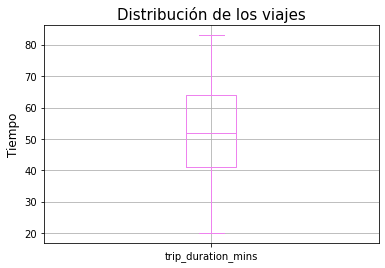

In [116]:
bp = df_final_1.boxplot(column="trip_duration_mins",color=("violet"))
bp.set_title("Distribución de los viajes", fontdict={"fontsize":15})
bp.set_ylabel("Tiempo", fontdict={"fontsize":12})

**Histograma**

Text(0, 0.5, 'Cantidad de viajes')

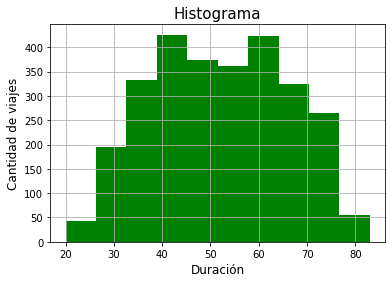

In [117]:
hist = df_final_1.hist(column="trip_duration_mins",color=("green"))
plt.title("Histograma", fontdict={"fontsize":15})
plt.xlabel("Duración", fontdict={"fontsize":12})
plt.ylabel("Cantidad de viajes", fontdict={"fontsize":12})

Se ve raro no? Si observamos el describe y el histograma, vemos que tenemos valores concentrados cercanos entre 0 y 100 aproximadamente, y algunos valores extraños (outliers).

**6.3 Topear la columna trip_duration_mins**

Aquellos valores mayores a 83 en la columna trip_duration_mins deben ser topeados en 83; y aquellos valores menores a 5 minutos, deben ser topeados en 5.

**Nota:** El motivo real por el que sucede esto es porque algunas entradas de datos estan erroneas. El problema es que hay ciertos registros de fecha que estan al revés, en donde el mes esta como el día y viceversa. La solución de este problema no será requerida en este trabajo, pero en caso que esten interesados en ver cómo solucionamos este tema, nos pueden escribir y les enviamos la solución. **Por el momento, solo topeen los valores como se menciona en la consigna**.

In [30]:
# Nota: los outliers ya fueron eliminados en 6.1, al haber tenido en cuenta el comentario en inglés

Chequear nuevamente la distribución graficando el boxplot.

In [31]:
# No se registraron valores anómalos por lo comentado anteriormente

### 7. Crear nueva columna "part_of_the_day" basandonos en la columna hora.


Rangos a crear:
- Morning: de 6 AM a 11 AM.
- Mi-day: de 12 a 14.
- Afternoon: de 15 a 17.
- Evening: de 18 a 21.
- Night: de 21 PM a 5 AM.

**Recomendación: Pueden usar la columna "request_hour" para crear dichas categorias en la nueva columna.**

**Pista:** Usar la funcion pd.cut con el siguiente formato:
```df_final["part_of_the_day"] = pd.cut(columna_hora,
[[0, 5, 11, 14, 17, 21, 24],
labels = [Categorias correspondientes a cada bucket ("night", "morning", ...,
right=True,
include_lowest=True)
```

Tener en cuenta que probablemente deban crear 2 categorias de night y luego reemplazarlas ya que sino no van a poder realizar los cortes.

In [45]:
df_final["part_of_the_day"] = pd.cut(df_final['request_hour'],
                                    bins=[0, 5, 11, 14, 17, 21, 24],
                                    labels=['Night', 'Morning', 'Mid-day','Afternoon', 'Evening', 'Night'],
                                    right=True,
                                    include_lowest=True,
                                    ordered=False)
#suponemos que "Night" es a partir de las 22hs y no de las 21hs como indica el enunciado. Sino, se pisa con evening


**7.1 Chequear con un groupby o un pivot_table los valores máximos y minimos de la columna request_hour, agrupando por la columna part_of_the_day**

In [55]:
df_final.groupby(by = ["part_of_the_day"])["request_hour"].max() #el valor máximo de night es 23 por ser el número más alto

part_of_the_day
Afternoon    17
Evening      21
Mid-day      14
Morning      11
Night        23
Name: request_hour, dtype: int64

In [56]:
df_final.groupby(by = ["part_of_the_day"])["request_hour"].min() #el valor mínimo de night es 0 por ser el número más alto

part_of_the_day
Afternoon    15
Evening      18
Mid-day      12
Morning       6
Night         0
Name: request_hour, dtype: int64

### 8. Análisis Exploratorio de datos

#### 8.1. Analizar las horas más populares en que los viajes son solicitados (no importa el status de request o trip).

**Graficar:**

Pueden usar sns.countplot() tanto para la columna part_of_the_day o request_hour.

Text(0.5, 1.0, 'Distribución de viajes por hora')

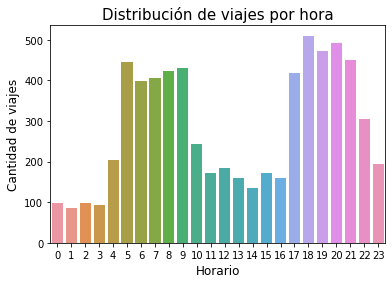

In [128]:
sns.countplot(df_final["request_hour"])
plt.ylabel("Cantidad de viajes", fontdict={"fontsize":12})
plt.xlabel("Horario", fontdict={"fontsize":12})
plt.title("Distribución de viajes por hora", fontdict={"fontsize":15})

**Insighs**

Comente brevemente los insights del analisis previo.

In [36]:
# Se solicitan mayor cantidad de viajes a la mañana y a la tarde
# Una posible causa es que coincide con los horarios de entrada y salida laboral

### 8.2. Distribución del estado de todos los viajes.

Analizar la distribución de la columna "Status".

**Graficar un barplot y calcular utilizando la value_counts() sobre la columna**

**Barplot**

Text(0.5, 1.0, 'Barplot')

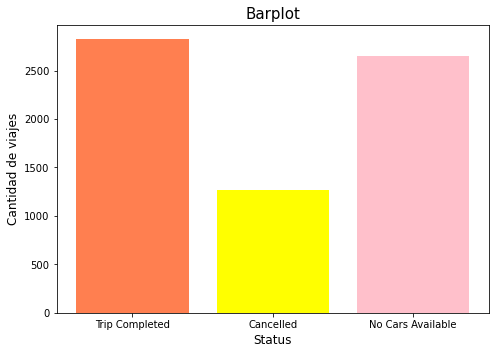

In [136]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Status = df_final["Status"].unique()
Quantity = df_final["Status"].value_counts(sort=False)
ax.bar(Status,Quantity, color=["coral", "yellow", "pink"])
plt.ylabel("Cantidad de viajes", fontdict={"fontsize":12})
plt.xlabel("Status", fontdict={"fontsize":12})
plt.title("Barplot", fontdict={"fontsize":15})

**Value_counts**

In [38]:
df_final["Status"].value_counts(sort=False)

Trip Completed       2831
Cancelled            1264
No Cars Available    2650
Name: Status, dtype: int64

**Insights**

Comente brevemente los insights.

In [39]:
# Observamos que hay un número muy similar de viajes completados y no realizados por no haber autos disponibles, lo cual habla sobre una gran demanda no cubierta
# El porcentaje de viajes cancelados es muy significativo, alcanzando un 18,74%. Se completaron el 41,97% de los viajes y no se concretó por no haber autos disponibles un 39,29% 

### 8.3.  Distribucion de viajes (trips) por parte del dia y status.

El proposito de este grafico es chequear la demanda de viajes por hora del dia, y chequear el status de esos viajes, para chequear donde tenemos problemas.

Text(0.5, 1.0, 'Distribución de viajes según parte del día y status')

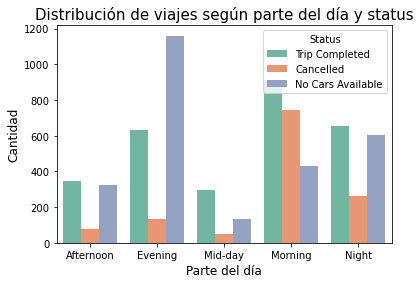

In [159]:
sns.countplot(x="part_of_the_day", hue="Status", data=df_final, palette = "Set2")
plt.ylabel("Cantidad", fontdict={"fontsize":12})
plt.xlabel("Parte del día", fontdict={"fontsize":12})
plt.title("Distribución de viajes según parte del día y status", fontdict={"fontsize":15})

In [62]:
df_final.groupby(by = ["part_of_the_day"])["Status"].value_counts()

part_of_the_day  Status           
Afternoon        Trip Completed        344
                 No Cars Available     326
                 Cancelled              78
Evening          No Cars Available    1160
                 Trip Completed        633
                 Cancelled             131
Mid-day          Trip Completed        298
                 No Cars Available     134
                 Cancelled              48
Morning          Trip Completed        900
                 Cancelled             744
                 No Cars Available     428
Night            Trip Completed        656
                 No Cars Available     602
                 Cancelled             263
Name: Status, dtype: int64

**Insights**

Comentar brevemente insights de los resultados obtenidos.

In [ ]:
#La mayor parte de los viajes cancelados se encuentran a la mañana
#Al mediodía disminuye considerablemente la demanda de viajes en general
#Durante la tarde noche existe una gran demanda no cubierta debido a la escasez de autos disponibles

### 8.4 Distribucion de pick up point por parte del dia.

La idea es obtener un por parte del dia, como se distribuyen los viajes respecto al pickup point.

In [64]:
df_final.groupby(by = ["part_of_the_day"])["Pickup point"].value_counts()

part_of_the_day  Pickup point
Afternoon        Airport          445
                 City             303
Evening          Airport         1492
                 City             432
Mid-day          City             278
                 Airport          202
Morning          City            1599
                 Airport          473
Night            City             895
                 Airport          626
Name: Pickup point, dtype: int64

**Insights**

Comente brevemente los insights.

In [43]:
# Observamos una gran cantidad de viajes solicitados desde la ciudad durante la mañana, posiblemente asociado al horario de ingreso laboral
# También resalta la concentración de viajes durante la tarde/noche desde el aeropuerto, probablemente en concordancia con el arribo de vuelos

### 8.5  Obtener el top 10 de conductores con mayores viajes.

El output esperado es el nombre de los 10 conductores con más viajes, junto a la cantidad de viajes de cada uno.

In [67]:
df_final["Name"].value_counts().nlargest(n=10)

Aston Hooper        22
Yousuf Haas         21
Bridget Roberson    21
Sharon Ahmed        21
Angelo Castillo     21
Harlan Cross        21
Kelvin Malone       20
Thiago Pitts        20
Rachael Haynes      20
Allen Hammond       20
Name: Name, dtype: int64

### 8.6  Obtener la distribución por genero

- Qué genero es más popular entre los conductores?
- Obtener la parte del dia más popular para el género femenino.

**Distribución de géneros**

Usar value_counts y tener en cuenta dropna.

In [160]:
df_final.groupby(by = ["Driver id"])["Gender"].unique().value_counts(dropna = True)

[M]    200
[F]    100
Name: Gender, dtype: int64

In [ ]:
#El género masculino es el más popular

**Parte del dia más popular para el genero femenino**

In [66]:
df_final[df_final["Gender"] == "F"]["part_of_the_day"].value_counts()

Morning      499
Night        323
Evening      246
Afternoon    146
Mid-day      119
Name: part_of_the_day, dtype: int64

In [47]:
#La parte del día más popular para el género femenino es la mañana